# Entregável 1 - visão computacional - Pedro Luiz

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.2 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

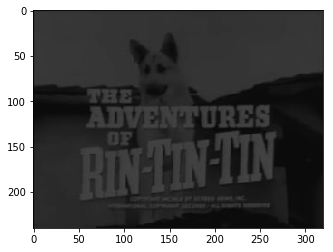

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

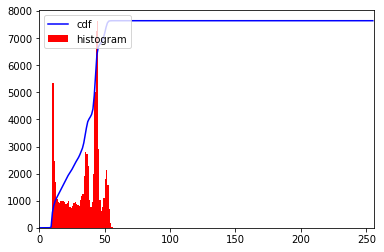

Max: 58
Min: 8


In [8]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
print("Max: {}".format(rintin_gray.max()))
print("Min: {}".format(rintin_gray.min()))

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores? 
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1) O histograma não aproveita a faixa de cores, pois os pixels variam apenas de 8 a 58, enquanto eles podem variar de 0 a 255.

In [9]:
#2)

maximo = rintin_gray.max()
minimo = rintin_gray.min()

rintin_gray_copy = rintin_gray.copy()

def equalizar(x):
    return (255*x)/(maximo - minimo) + (255-maximo*255/50)

for i in range(len(rintin_gray)):
    for j in range(len(rintin_gray[i])):
        pixel_novo = equalizar(rintin_gray[i][j])
        rintin_gray_copy[i][j] = pixel_novo

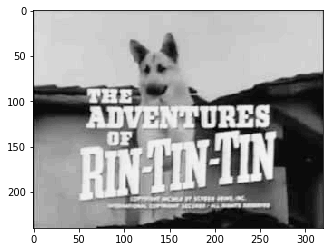

In [10]:
plt.imshow(rintin_gray_copy, cmap = 'Greys_r')

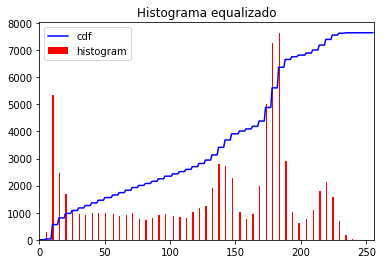

In [12]:
hist,bins = np.histogram(rintin_gray_copy.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray_copy.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma equalizado")
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


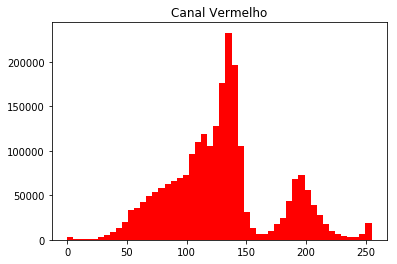

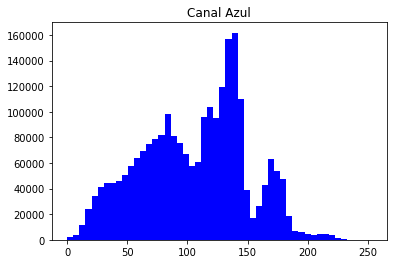

In [14]:
#1)
img_ex_2 = cv2.imread('hall_box_battery1.jpg')
canal_r = img_ex_2[:,:,2]
canal_b = img_ex_2[:,:,0]

plt.hist(canal_r.flatten(), bins=50,color='r')
plt.title('Canal Vermelho')
plt.show()

plt.hist(canal_b.flatten(), bins=50,color='b')
plt.title('Canal Azul')
plt.show()

Não é possível identificar nem a caixa nem a bateria com base nos histogramas, uma vez que há mais objetos na imagem que possuem as componentes azul e vermelha nos pixels, como por exemplo o rodapé branco e a parede roxa.

In [15]:
#2)
img_ex_2_copy = img_ex_2.copy()

for i in range(0,len(img_ex_2_copy)):
    for j in range(0,len(img_ex_2_copy[i])):
        pixel = img_ex_2_copy[i][j]
        if pixel[2] > 150 and pixel[0] < 100:
            img_ex_2_copy[i][j] = [255,255,255]

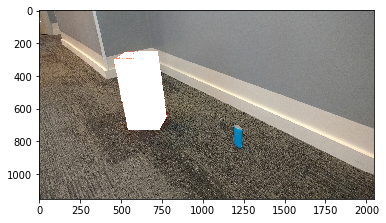

In [16]:
plt.imshow(cv2.cvtColor(img_ex_2_copy, cv2.COLOR_BGR2RGB))
plt.show()

# Atividade 3


Crie uma cópia da versão Grayscale figura acima, em que cada pixel  recebe a subtração entre o pixel que vem depois e o que vem antes dele. Apresente a imagem resultado.

In [17]:
#3)
img_ex_3 = cv2.imread('hall_box_battery_atividade3.png')
img_ex_3_gray = cv2.cvtColor(img_ex_3, cv2.COLOR_BGR2GRAY)
img_ex_3_copy = img_ex_3.copy()

for i in range(1,len(img_ex_3)-1):
    for j in range(1, len(img_ex_3[i])-1):
        img_ex_3_copy[i][j] = abs(int(img_ex_3_gray[i][j+1]) - int(img_ex_3_gray[i][j-1])) 

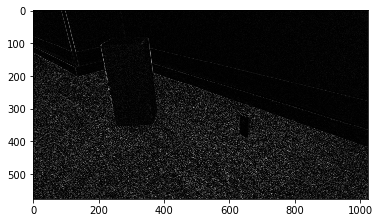

In [18]:
plt.imshow(img_ex_3_copy, cmap="Greys_r", vmin=0, vmax=255)